In [9]:
import pandas as pd
import numpy as np
from scipy import ndimage
import imageio
from PIL import Image
from skimage.transform import resize
import cv2
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import os
import shutil

In [3]:
# windows
os.getcwd()
ruta="C:\\Users\\javie\\OneDrive\\Documentos\\Hacker\\Proyecto-Machine-Learning\\data\\raw_data\\raw"
os.chdir(ruta)

In [32]:
images_os = os.getcwd()
im = Image

In [31]:
os.chdir("C:\\Users\\javie\\OneDrive\\Documentos\\Hacker\\Proyecto-Machine-Learning\\data\\raw_data\\raw")
images_os = os.getcwd()
for name_rut in os.listdir(images_os):
    ruta = f"C:\\Users\\javie\\OneDrive\\Documentos\\Hacker\\Proyecto-Machine-Learning\\data\\raw_data\\raw\\{name_rut}"
    os.chdir(ruta)
    img_rut = os.getcwd()
    for archivo in os.listdir(img_rut):
        try:
            image = Image.open(archivo)
            name_arch = archivo.split(".")
            new_image = image.resize((250, 250))
            new_image.save(f"{name_arch[0]}_resize.png")
            destination_path = f"C:\\Users\\javie\\OneDrive\\Documentos\\Hacker\\Proyecto-Machine-Learning\\data\\raw_data\\image_resize\\{name_rut}"
            if not os.path.exists(destination_path):
                os.makedirs(destination_path)
            shutil.move(f"{name_arch[0]}_resize.png", destination_path)
        except Exception:
            print(Exception)
    os.chdir("C:\\Users\\javie\\OneDrive\\Documentos\\Hacker\\Proyecto-Machine-Learning\\data\\raw_data\\raw")

dew
fogsmog
frost
glaze
hail
lightning
rain
rainbow
rime
sandstorm
snow


In [6]:
os.chdir("C:\\Users\\javie\\OneDrive\\Documentos\\Hacker\\Proyecto-Machine-Learning\\data\\raw_data\\image_resize")
images_os = os.getcwd()
for name_rut in os.listdir(images_os):
    ruta = f"C:\\Users\\javie\\OneDrive\\Documentos\\Hacker\\Proyecto-Machine-Learning\\data\\raw_data\\image_resize\\{name_rut}"
    os.chdir(ruta)
    img_rut = os.getcwd()
    for archivo in os.listdir(img_rut):
        r = f"C:\\Users\\javie\\OneDrive\\Documentos\\Hacker\\Proyecto-Machine-Learning\\data\\raw_data\\image_resize\\{name_rut}\\{archivo}"
        img = cv2.imread(r)
        img = cv2.resize(img, (50, 50))

        blue, green, red = cv2.split(img)
        # Initialize PCA with first 20 principal components
        pca = PCA(50)
        
        #Applying to red channel and then applying inverse transform to transformed array.
        red_transformed = pca.fit_transform(red)
        red_inverted = pca.inverse_transform(red_transformed)

        #Applying to Green channel and then applying inverse transform to transformed array.
        green_transformed = pca.fit_transform(green)
        green_inverted = pca.inverse_transform(green_transformed)
        
        #Applying to Blue channel and then applying inverse transform to transformed array.
        blue_transformed = pca.fit_transform(blue)
        blue_inverted = pca.inverse_transform(blue_transformed)

        img_compressed = (cv2.merge([red_inverted, green_inverted, blue_inverted])).astype(np.uint8)

        destination_path = f"C:\\Users\\javie\\OneDrive\\Documentos\\Hacker\\Proyecto-Machine-Learning\\data\\raw_data\\image_compressed\\{name_rut}"
        #try:
        name_arch = archivo.split(".")
        cv2.imwrite(f"{name_arch[0]}_compressed.png", img_compressed)

        if not os.path.exists(destination_path):
            os.makedirs(destination_path)
        shutil.move(f"{name_arch[0]}_compressed.png", destination_path)
        #except Exception:
            #print(Exception)
    
    os.chdir("C:\\Users\\javie\\OneDrive\\Documentos\\Hacker\\Proyecto-Machine-Learning\\data\\raw_data\\image_resize")

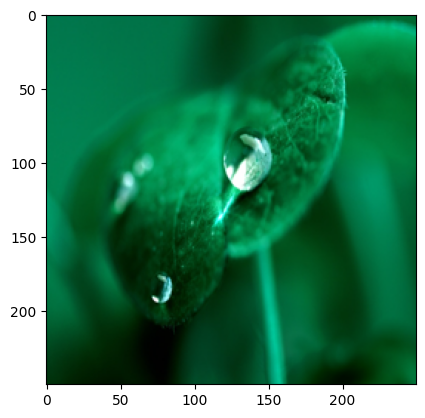

In [52]:
img = cv2.imread("C:\\Users\\javie\\OneDrive\\Documentos\Hacker\\Proyecto-Machine-Learning\\data\\raw_data\\image_resize\\dew\\2208_resize.png")
plt.imshow(img);

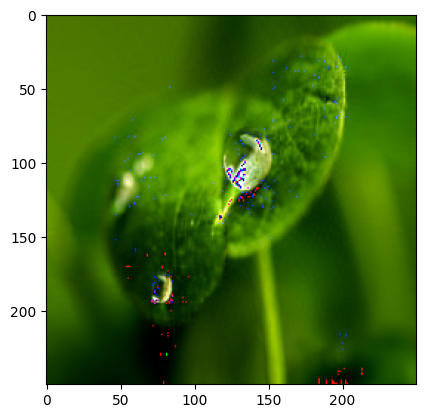

In [15]:
img = cv2.imread("C:\\Users\\javie\\OneDrive\\Documentos\Hacker\\Proyecto-Machine-Learning\\data\\raw_data\\image_compressed\\dew\\2208_resize_compressed.png")
plt.imshow(img);

In [49]:
# Windows
ruta="C:\\Users\\javie\\OneDrive\\Documentos\\Hacker\\Proyecto-Machine-Learning\\data\\raw_data\\image_resize"
images_os = os.chdir(ruta)

In [21]:
# Mac

ruta = "/Users/javierdealcazar/TheBridgeDataScience/TheBridgeJavierAlcazar/MisProyectos/Proyecto-Machine-Learning/data/image_resize"
images_os = os.chdir(ruta)

In [12]:
ruta="C:\\Users\\javie\\OneDrive\\Documentos\Hacker\\Proyecto-Machine-Learning\\data\\raw_data\\image_compressed"
images_os = os.chdir(ruta)
dict_comp_flat_px = []
dict_comp_pix = []
names = []
for name_rut in os.listdir(images_os):
    ruta = f"C:\\Users\\javie\\OneDrive\\Documentos\\Hacker\\Proyecto-Machine-Learning\\data\\raw_data\\image_compressed\\{name_rut}"
    os.chdir(ruta)
    img_rut = os.getcwd()
    for archivo in os.listdir(img_rut):
        image = Image.open(archivo)
        pix_val =np.array(image)
        name_arch = archivo.split(".")
        name_arch = name_arch[0].split("_")
        name_arch = name_arch[0]
        if len(pix_val.flatten()) == 7500 or pix_val.size == 7500:
            dict_comp_flat_px.append(pix_val.flatten())
            dict_comp_pix.append(pix_val)
            names.append(name_rut)
        else:
            print(pix_val.size)
            print(name_arch)
    
    

In [6]:
df_comp = pd.DataFrame(dict_comp_flat_px, columns=np.arange(0,7500))
df_comp

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,0,117,75,1,116,76,0,117,75,1,...,25,0,79,22,0,90,33,0,112,53
1,30,52,39,35,59,46,32,56,43,28,...,79,71,105,75,74,110,82,67,105,74
2,9,58,39,43,105,77,29,77,54,15,...,1,5,0,1,5,0,1,4,0,0
3,0,15,0,0,20,0,2,25,0,0,...,1,1,51,1,1,50,1,0,52,1
4,228,227,213,217,217,201,230,228,215,226,...,206,221,218,209,211,210,196,211,203,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6857,92,82,81,125,114,114,124,114,114,140,...,126,97,99,93,117,116,109,80,81,82
6858,79,37,14,80,37,14,79,37,14,76,...,10,47,31,19,43,28,12,56,38,23
6859,197,163,140,191,158,133,209,167,144,208,...,149,16,30,26,70,81,89,34,53,55
6860,10,10,9,9,8,8,14,13,13,18,...,45,50,62,59,43,53,44,55,65,56


In [13]:
df_comp["name_img"] = names

In [14]:
df_comp_randomizado = df_comp.sample(frac=1).reset_index(drop=True)
df_comp_randomizado

,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,name_img
0,2,8,3,27,32,27,29,35,30,10,...,113,108,109,84,79,80,71,72,69,hail
1,12,7,10,0,1,6,94,166,161,14,...,11,23,30,45,55,65,123,127,130,frost
2,145,140,140,161,159,158,133,131,130,141,...,94,95,111,103,102,118,93,92,106,rime
3,63,98,91,98,152,145,127,172,157,122,...,21,55,40,18,63,49,36,92,64,glaze
4,230,167,88,231,169,89,231,169,91,231,...,240,243,243,236,238,241,240,240,242,rime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6857,236,190,162,235,187,160,234,187,159,233,...,204,198,198,194,191,190,193,187,182,rime
6858,241,136,92,243,139,94,244,141,92,247,...,253,226,211,238,196,176,238,199,179,rime
6859,224,170,108,225,175,111,226,180,123,226,...,111,85,102,4,1,0,155,132,150,rime
6860,88,60,48,95,70,55,104,80,68,113,...,115,96,80,135,116,98,132,107,89,rime


In [9]:
df_train_comp = df_comp_randomizado.iloc[0:5465,:]


# Windows
ruta="C:\\Users\\javie\\OneDrive\\Documentos\\Hacker\\Proyecto-Machine-Learning"
os.chdir(ruta)
df_train_comp.to_csv(".\\data\\datasets\\train.csv", sep=";")

In [10]:
df_test_comp = df_comp_randomizado.iloc[5465:,:]

# Windows
ruta="C:\\Users\\javie\\OneDrive\\Documentos\\Hacker\\Proyecto-Machine-Learning"
os.chdir(ruta)
df_test_comp.to_csv(".\\data\\datasets\\test.csv", sep=";")

In [3]:
df_train = pd.read_csv("..\\data\\datasets\\train.csv", sep=";")
df_test = pd.read_csv("..\\data\\datasets\\test.csv", sep=";")

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5465 entries, 0 to 5464
Columns: 7502 entries, Unnamed: 0 to name_img
dtypes: int64(7501), object(1)
memory usage: 312.8+ MB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Columns: 7502 entries, Unnamed: 0 to name_img
dtypes: int64(7501), object(1)
memory usage: 80.0+ MB


In [6]:
df_train["name_img"].value_counts(normalize=True)

name_img
rime         0.175114
fogsmog      0.120586
sandstorm    0.101006
dew          0.100823
glaze        0.093321
snow         0.089478
hail         0.083623
rain         0.076670
frost        0.069716
lightning    0.057274
rainbow      0.032388
Name: proportion, dtype: float64

In [7]:
df_test["name_img"].value_counts(normalize=True)

name_img
rime         0.145311
fogsmog      0.137437
dew          0.105225
sandstorm    0.100215
hail         0.095920
snow         0.094488
glaze        0.092341
rain         0.076593
frost        0.067287
lightning    0.045812
rainbow      0.039370
Name: proportion, dtype: float64

In [8]:
df_train.drop(columns="Unnamed: 0", inplace=True)
df_test.drop(columns="Unnamed: 0", inplace=True)

In [10]:
le = LabelEncoder()
le.fit(df_train["name_img"])
df_train["name_img_encode"] = le.transform(df_train["name_img"])

In [11]:
df_train["name_img_encode"].value_counts()

name_img_encode
8     957
1     659
9     552
0     551
3     510
10    489
4     457
6     419
2     381
5     313
7     177
Name: count, dtype: int64

In [12]:
df_train["name_img_encode"].value_counts(normalize=True)

name_img_encode
8     0.175114
1     0.120586
9     0.101006
0     0.100823
3     0.093321
10    0.089478
4     0.083623
6     0.076670
2     0.069716
5     0.057274
7     0.032388
Name: proportion, dtype: float64

In [13]:
le = LabelEncoder()
le.fit(df_test["name_img"])
df_test["name_img_encode"] = le.transform(df_test["name_img"])

In [14]:
df_test["name_img_encode"].value_counts(normalize=True)

name_img_encode
8     0.145311
1     0.137437
0     0.105225
9     0.100215
4     0.095920
10    0.094488
3     0.092341
6     0.076593
2     0.067287
5     0.045812
7     0.039370
Name: proportion, dtype: float64

In [19]:
df_train.to_csv("..\\data\\datasets\\train.csv", sep=";")

In [20]:
df_test.to_csv("..\\data\\datasets\\test.csv", sep=";")